In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Open the .csv files
X_train = pd.read_csv('/Users/arnav/Desktop/MachineLearning/ML_CSE343 Project/train_tfidf.csv')
X_test = pd.read_csv('/Users/arnav/Desktop/MachineLearning/ML_CSE343 Project/test_tfidf.csv')

X_train = X_train.drop(['Unnamed: 0'], axis=1)
X_test = X_test.drop(['Unnamed: 0'], axis=1)

# Check the shape of the data
print(X_train.shape)
print(X_test.shape)

(22500, 1000)
(7500, 1000)


In [3]:
# Extract the features into a numpy array
X_train = X_train.values
X_test = X_test.values

# Open the labels
y_train_df = pd.read_csv('/Users/arnav/Desktop/MachineLearning/ML_CSE343 Project/CSE343-ML-Project/Data/Preprocessed-Data/train_labels.csv')
y_test_df = pd.read_csv('/Users/arnav/Desktop/MachineLearning/ML_CSE343 Project/CSE343-ML-Project/Data/Preprocessed-Data/test_labels.csv')

# Check the shape of the labels
print(y_train_df.shape)
print(y_test_df.shape)

(22500, 1)
(7500, 1)


In [4]:
# Convert class to non_suicide = 0 and suicide = 1
y_train_temp = y_train_df['class'].values
y_test_temp = y_test_df['class'].values

# Check the shape of the labels
print(y_train_temp.shape)
print(y_test_temp.shape)

y_train = np.array([0 if label == "non-suicide" else 1 for label in y_train_temp])
y_test = np.array([0 if label == "non-suicide" else 1 for label in y_test_temp])

# Check the shape of the labels
print(y_train.shape)
print(y_test.shape)

(22500,)
(7500,)
(22500,)
(7500,)


In [5]:
# Decision Tree Classifier
rfc = RandomForestClassifier(n_estimators=10, criterion='gini')

# Fit the model
rfc.fit(X_train, y_train)

# Predict on the test data
y_pred = rfc.predict(X_test)

In [6]:
# Print the accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print AUC score
print("AUC Score:", roc_auc_score(y_test, y_pred))

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8757333333333334
Confusion Matrix:
 [[3325  383]
 [ 549 3243]]
AUC Score: 0.8759656678000355
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      3708
           1       0.89      0.86      0.87      3792

    accuracy                           0.88      7500
   macro avg       0.88      0.88      0.88      7500
weighted avg       0.88      0.88      0.88      7500



In [7]:
# Print weighted F1-score
print("Weighted F1-score:", f1_score(y_test, y_pred, average='weighted'))

Weighted F1-score: 0.875703258309491


Precision-Recall Metrics:
               precision    recall  f1-score   support

           0      0.858     0.897     0.877      3708
           1      0.894     0.855     0.874      3792

    accuracy                          0.876      7500
   macro avg      0.876     0.876     0.876      7500
weighted avg      0.877     0.876     0.876      7500



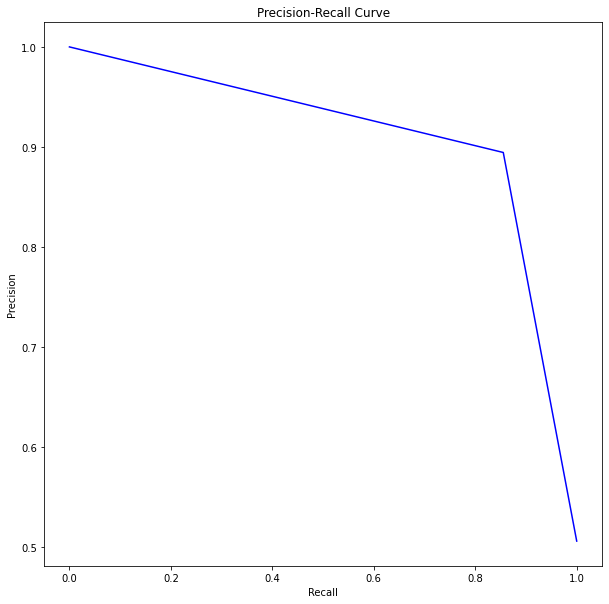

In [8]:
# Print the precision and recall, among other metrics
print("Precision-Recall Metrics:\n", classification_report(y_test, y_pred, digits=3))

# # Plot the ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(10, 10))
# plt.title('ROC Curve')
# plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
# plt.legend(loc='lower right')

# Plot the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(10, 10))
plt.title('Precision-Recall Curve')
plt.plot(recall, precision, 'b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()